<a href="https://colab.research.google.com/github/Ruby-pearl1/hds5210-2025/blob/main/week10/week10_assignment_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 10 Assignment

_MkKinney 6.1_

The work this week has involved using Pandas to load, manipulate, and visualize data.  For this exercise, we're going to be working with some of the price transparency data from [Baptist Health Medical Center](https://www.baptist-health.com/hospital-charges-and-negotiated-rates/) in Little Rock, AR. We've chosen them because their data is relatively easy to reach with Pandas and has some interesting insights.

Note that the files we're working with here are from 2021. Baptist Health has since changed the file format.  This won't work correctly if you try to do it with files downloaded from the website above.

To do this homework, please go to Canvas to find the proper data.

---
---

### 41.1 Loading and viewing the data

There are four files in the `/data` directory related to Baptist Health:
* bhmclr_cpt.xlsx
* bhmclr_drg.xlsx
* bhmclr_med.xlsx
* bhmclr_proc.xlsx

All of these files have the same format, so you can load and process them all the same way, but the subsets of data in each are distinct.

For this first step, we're going to load the DRG data and inspect it using Pandas.  If you download this file and open it in Excel, there will be a few things you notice:
1. The workbook has two sheets: "Pivot" and "Sheet1" - "Sheet1" is the one we want
2. "Sheet1" has three rows before we get to the actual table header - we'll want to skip those rows
3. Also, I've filtered the data to just those DRGs where the cash price is less than 20,000 for demo purposes

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_excel('/content/drive/MyDrive/HDS5210-2025/WEEK 7/bhmclr_drg.xlsx')

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import os
excel_file_path = os.path.join('/content/drive/MyDrive', 'charges', 'bhmclr_drg.xlsx')
excel_file = pd.ExcelFile('/content/drive/MyDrive/HDS5210-2025/WEEK 7/bhmclr_drg.xlsx')
print(excel_file.sheet_names)

['Pivot', 'Sheet1']


In [56]:
import pandas as pd

# Load the correct sheet and skip first 3 rows
data = pd.read_excel('/content/drive/MyDrive/HDS5210-2025/WEEK 7/bhmclr_drg.xlsx',
                     sheet_name='Sheet1',
                     skiprows=3)
data.head()


,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
0,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 013,NaN,NaN,MS013,"Tracheostomy For Face, Mouth And Neck Diagnose...",1,AETNA [65000],59006.00,31705.95,11936.11,31705.95,15341.56,0,NaN,NaN,NaN,NaN
1,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 022,NaN,NaN,MS022,Intracranial Vascular Procedures With Principa...,1,AETNA [65000],61399.00,61399.00,15963.74,61399.00,15963.74,0,NaN,NaN,NaN,NaN
2,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 024,NaN,NaN,MS024,Craniotomy With Major Device Implant Or Acute ...,1,AETNA [65000],72401.56,NaN,7770.00,23719.14,18824.41,0,NaN,NaN,NaN,NaN
3,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 025,NaN,NaN,MS025,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],76565.21,57449.30,7770.00,57449.30,19906.95,0,NaN,NaN,NaN,NaN
4,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 026,NaN,NaN,MS026,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],64748.06,29999.01,2913.75,29999.01,16834.50,0,NaN,NaN,NaN,NaN


In [57]:
data.shape

(3864, 19)

In [58]:
data.columns

Index(['Location', 'Code Type', 'Code', 'NDC', 'Rev Code', 'Procedure',
       'Procedure Description', 'Quantity', 'Payer', 'IP Charge',
       'IP Expected Reimbursement', 'MIN_IP_XR', 'MAX_IP_XR', 'IP Cash Price',
       'OP Charge', 'OP Expected Reimbursement', 'MIN_OP_XR', 'MAX_OP_XR',
       'OP Cash Price'],
      dtype='object')

array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

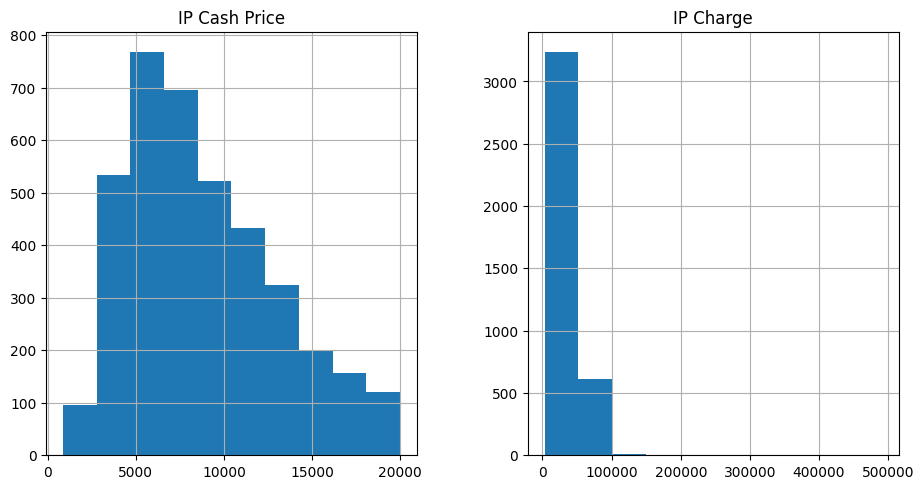

In [60]:
data[['IP Cash Price','IP Charge']].hist(figsize=(11,5.5))

array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

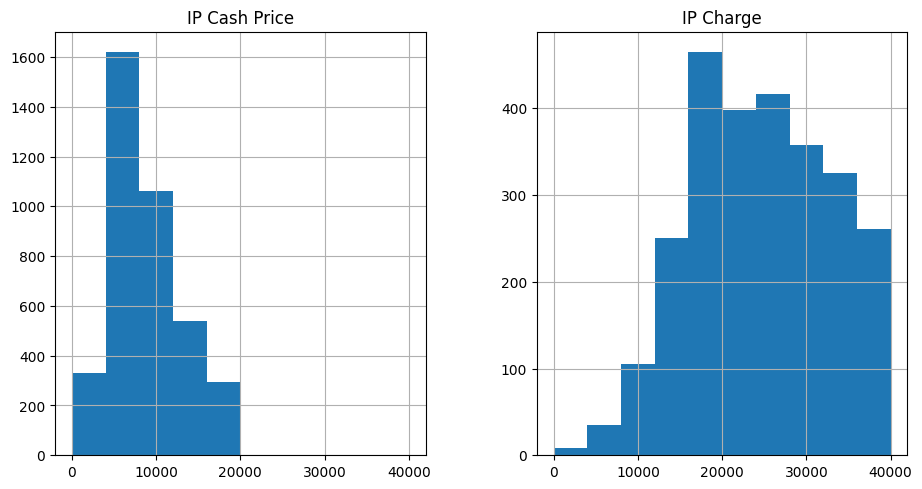

In [61]:
data[['IP Cash Price','IP Charge']].hist(range=[0,40000], figsize=(11,5.5))

In [62]:
high_cost_filter = data['IP Charge'] > 100000
data.loc[high_cost_filter]

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
800,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ALLWELL [15100],120026.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
858,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ALLWELL [15100],102435.46,16684.09,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
934,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 461,NaN,NaN,MS461,Bilateral Or Multiple Major Joint Procedures O...,1,ALLWELL [15100],121126.29,NaN,8741.25,9225.00,NaN,0,NaN,NaN,NaN,NaN
1171,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 802,NaN,NaN,MS802,Other O.R. Procedures Of The Blood And Blood F...,1,ALLWELL [15100],143667.09,NaN,9725.00,10204.12,10204.12,0,NaN,NaN,NaN,NaN
1264,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 939,NaN,NaN,MS939,O.R. Procedures With Diagnoses Of Other Contac...,1,ALLWELL [15100],480809.48,NaN,7790.37,7790.37,7790.37,0,NaN,NaN,NaN,NaN
1945,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 037,NaN,NaN,MS037,Extracranial Procedures With McC,1,ARKANSAS TOTAL CARE [40700],123035.47,NaN,17816.08,39275.00,17816.08,0,NaN,NaN,NaN,NaN
2091,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ARKANSAS TOTAL CARE [40700],121981.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2138,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 333,NaN,NaN,MS333,Rectal Resection With Cc,1,ARKANSAS TOTAL CARE [40700],128929.41,NaN,12824.58,26704.23,15975.34,0,NaN,NaN,NaN,NaN
2149,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ARKANSAS TOTAL CARE [40700],104304.46,NaN,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
2192,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 408,NaN,NaN,MS408,Biliary Tract Procedures Except Only Cholecyst...,1,ARKANSAS TOTAL CARE [40700],108898.78,NaN,19861.16,22240.28,19861.16,0,NaN,NaN,NaN,NaN


### Question:

**What do you observe from the histograms above?**

### YOUR RESPONSE:The histograms show that both inpatient cash prices and billed charges are highly right-skewed, indicating that most DRG services are priced on the lower end while a few are extremely high-cost outliers. The “IP Charge” distribution is shifted to the right of the “IP Cash Price” distribution, meaning that list prices are substantially higher and more variable than the discounted self-pay amounts. Limiting the range to $0–$40,000 highlights that the majority of inpatient prices cluster below that threshold.



---

### 41.2 Plotting a KDE instead

Instead of a historgam, let's plot overlapping [KDEs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.kde.html).

(0.0, 40000.0)

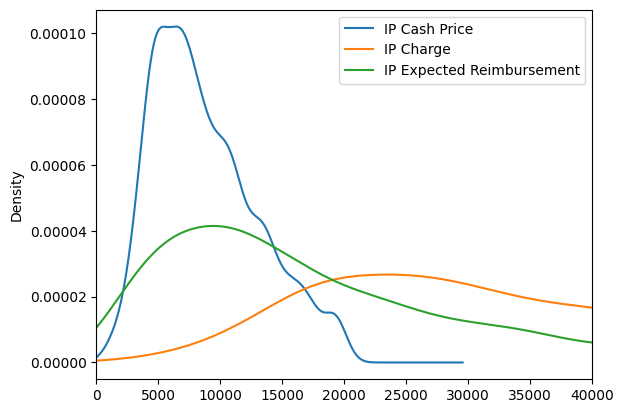

In [63]:
graph = data[['IP Cash Price','IP Charge','IP Expected Reimbursement']].plot.kde()
graph.set_xlim(0, 40000)

### Question:

If I told you what these values represent, what conclusions could you draw about the pattern?
* IP Cash Price is the amount you would pay on your own without using insurance
* IP Charge is the maximum amount for which the hospital says it can submit a bill to an insurance company
* IP Expected Reimbursement is the amount that the hospital believes it is contracted to receive in payment from an insurance company

### YOUR RESPONSE:

The KDE plot shows that each of the three price types follows a similar overall shape but is centered at different price levels, revealing a clear hierarchy in hospital pricing.
The IP Charge curve lies farthest to the right, indicating that the hospital’s listed or billable charges are the highest and most variable. The IP Expected Reimbursement curve is in the middle, representing the lower amounts that insurers have negotiated and the hospital expects to actually receive. The IP Cash Price curve is shifted farthest to the left, showing that self-pay patients generally face the lowest and most consistent prices.
This pattern suggests that hospitals set high list charges for negotiation leverage, insurers pay reduced contracted rates, and uninsured or cash-pay patients are often offered deep discounts for direct payment. Overall, the three curves illustrate the gap between billed, negotiated, and actual received prices, highlighting how complex and tiered hospital pricing structures are.


---

### 41.3 Creating a new set of series

In order to understand how this data varies across different payers, we have to create new data series that are based on the payer information.  In the data, we have a column called **Payer** that holds this information.

We can use the Pandas [groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) function to create groupings based on Payer and then plot kde based on those groupings.  When [plotting a Pandas groupby result](https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.core.groupby.DataFrameGroupBy.plot.html), the options are different than plotting a dataframe.

In [64]:
data['Payer'].value_counts()

,count
Payer,
ALLWELL [15100],650
ARKANSAS TOTAL CARE [40700],650
AETNA [65000],641
AR BLUE CROSS BLUE SHIELD [25001],641
HEALTHSCOPE [95700],641
MULTIPLAN,641


In [65]:
data.groupby(['Payer'])['IP Expected Reimbursement'].count()

,IP Expected Reimbursement
Payer,
AETNA [65000],372
ALLWELL [15100],519
AR BLUE CROSS BLUE SHIELD [25001],450
ARKANSAS TOTAL CARE [40700],404
HEALTHSCOPE [95700],641
MULTIPLAN,641


,IP Expected Reimbursement
Payer,
AETNA [65000],"Axes(0.125,0.11;0.775x0.77)"
ALLWELL [15100],"Axes(0.125,0.11;0.775x0.77)"
AR BLUE CROSS BLUE SHIELD [25001],"Axes(0.125,0.11;0.775x0.77)"
ARKANSAS TOTAL CARE [40700],"Axes(0.125,0.11;0.775x0.77)"
HEALTHSCOPE [95700],"Axes(0.125,0.11;0.775x0.77)"
MULTIPLAN,"Axes(0.125,0.11;0.775x0.77)"


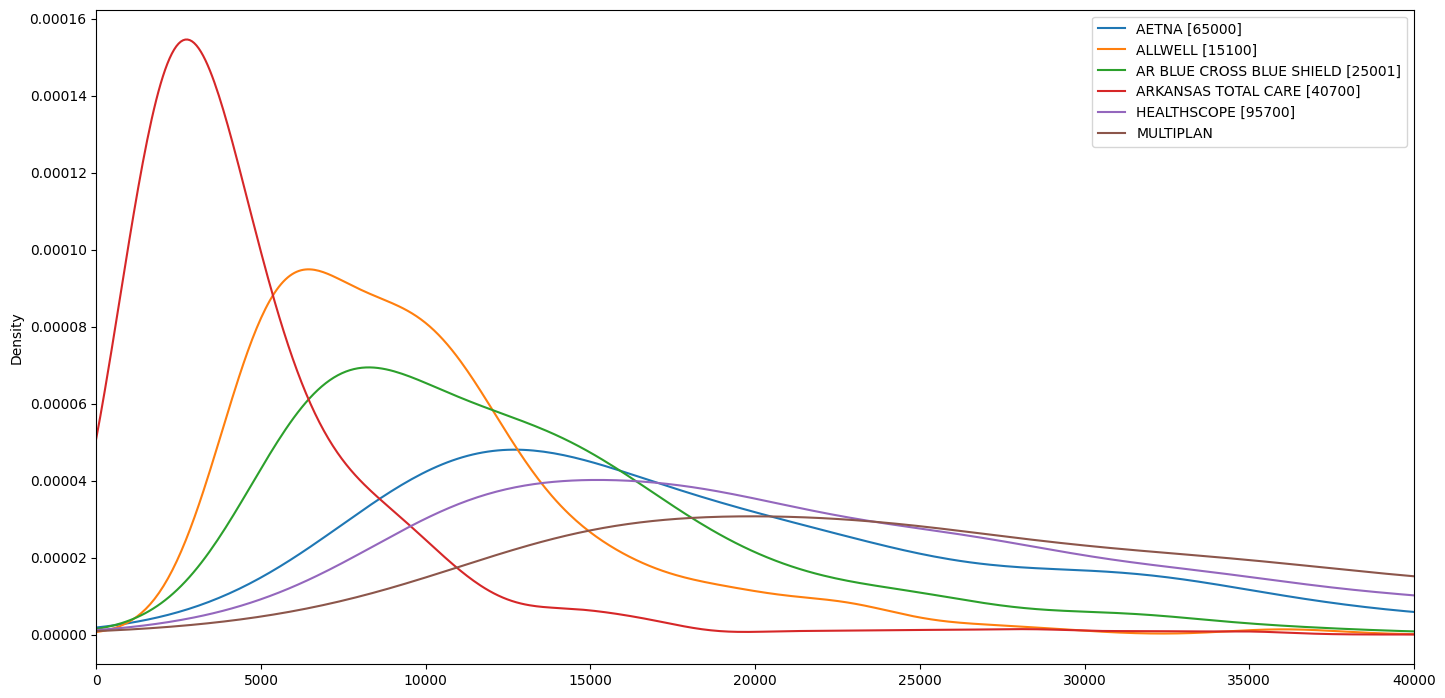

In [66]:
data.groupby(['Payer'])['IP Expected Reimbursement'].plot.kde(
    xlim=(0,40000),
    legend=True,
    figsize=(17,8.5)
)


### Question:

Remember what this KDE represents. The x-axis is the price being reimbursement for a particular service and the y-axis represents how many different records in the input fall into that price range.  So, the higher the line at any particular x value, the more records are there.

If the line is higher the further left you go, that means most prices are lower.  If the peak of the line is more the the right, then the typical price is higher.

* What do you observe about the patterns in reimbursement above?
* What does that tell you about these particular plans?


### YOUR RESPONSE:The KDE plot shows that all payers follow a similar overall reimbursement pattern, with most expected payments clustered toward the lower end of the scale. This indicates that the majority of inpatient services are reimbursed at modest rates, while only a few DRGs receive higher payments. Payers whose curves peak further to the left—such as Allwell and Arkansas Total Care—tend to have lower negotiated reimbursement rates, consistent with Medicaid or managed-care plans. In contrast, curves that peak slightly further right—such as Aetna, Blue Cross Blue Shield, and Healthscope—reflect higher negotiated payment levels typical of commercial insurance contracts. Overall, the plot demonstrates modest but meaningful differences in how each plan reimburses the hospital, with public or managed-care plans paying the least and private insurers paying somewhat more.

Double-click this cell to edit and provide your response


---

### 41.4 Seeing if there's any correlation

So, we know that there are cash prices and insurance paid prices.  How strongly correlated are those amounts?

We can use a scatterplot with one value on the x axis and the other on the y axis to do a simple visualization of this.

<Axes: xlabel='IP Charge', ylabel='IP Expected Reimbursement'>

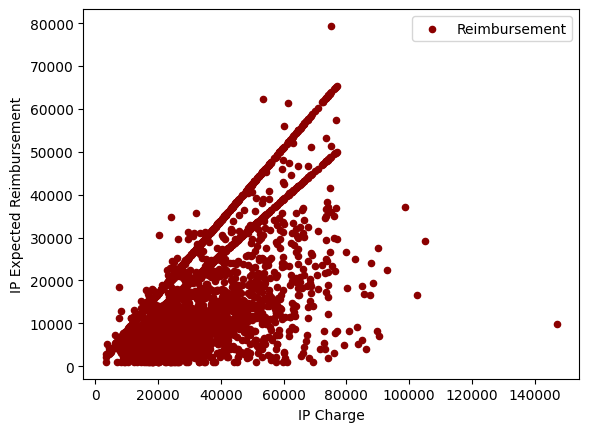

In [67]:
data.plot.scatter(x='IP Charge', y='IP Expected Reimbursement', color='DarkRed', label='Reimbursement')

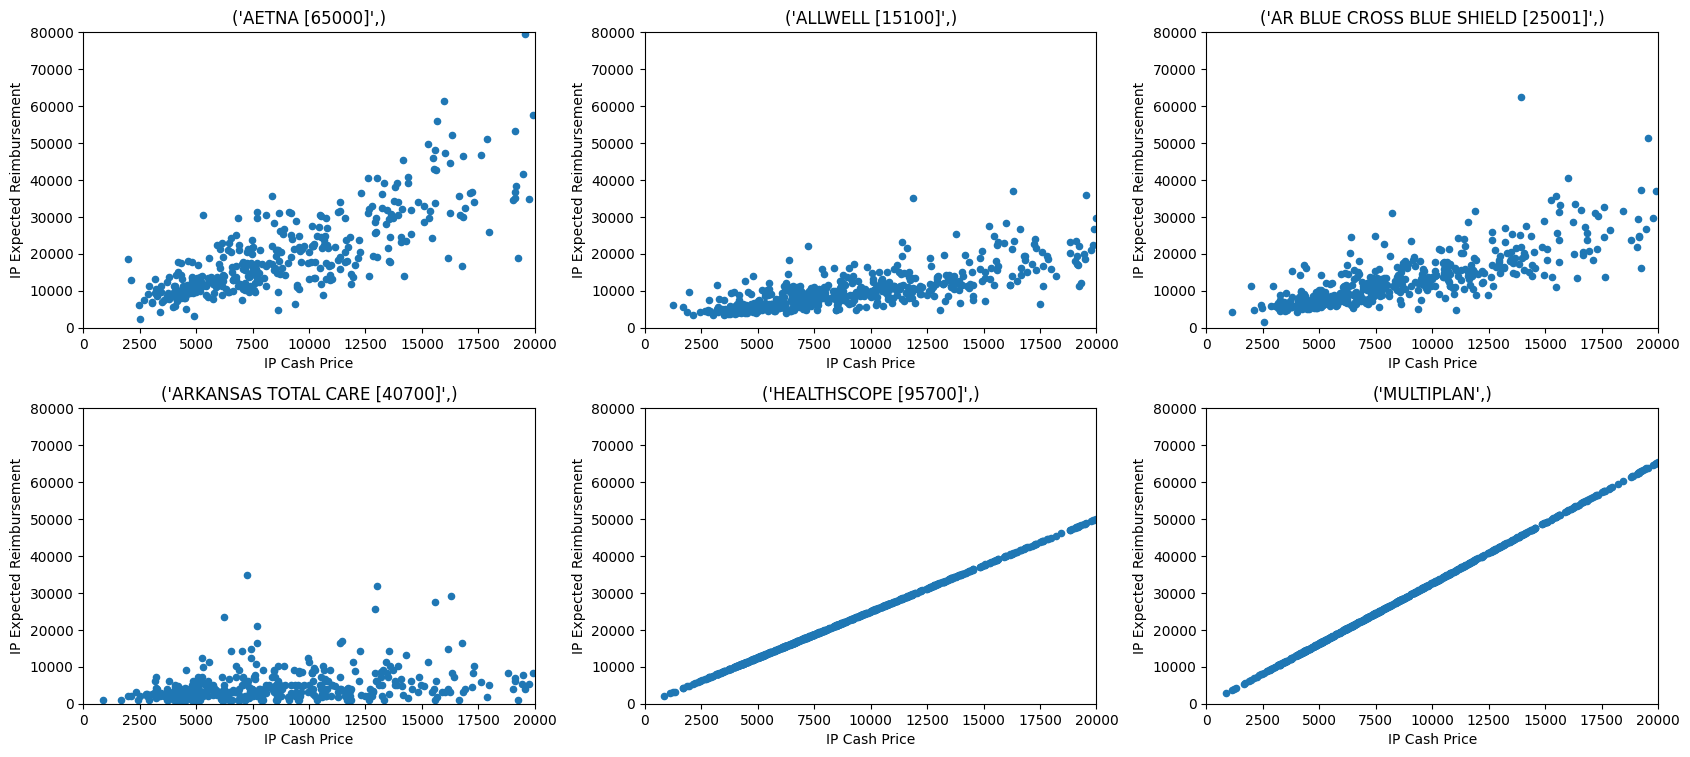

In [68]:
groups = data.groupby(['Payer'])
plt.figure(figsize=(17,11))

for i, (payer, prices) in enumerate(groups):
    ax = plt.subplot(3,3, i+1)
    prices.plot.scatter(x='IP Cash Price',y='IP Expected Reimbursement',ax=ax)
    ax.set_title(payer)
    ax.set_xlim(0,20000)
    ax.set_ylim(0,80000)

plt.tight_layout()
plt.show()

### YOUR RESPONSE:
The scatterplots show a generally positive relationship between hospital charges and expected reimbursements, meaning that more expensive procedures tend to generate higher insurer payments. However, the relationship is not perfectly linear, indicating that charges do not fully predict reimbursements because insurers pay only contracted rates. When separated by payer, the plots reveal meaningful differences: commercial payers such as Aetna and Blue Cross Blue Shield show tighter upward trends (stronger correlation and higher reimbursements), while Medicaid or managed-care plans such as Allwell and Arkansas Total Care show flatter, more dispersed patterns (lower and less predictable reimbursements). Overall, the analysis confirms that although higher charges often lead to higher payments, reimbursement levels are heavily influenced by payer-specific contracts and not by hospital list prices alone.
Double-click this cell to edit and provide your response


---

### 41.5 Find Something of Your Own

What data are you interested in?  To earn full credit this week, you'll need to do the following:
1. Bring in some other data that you're interested in visualizing.  You can upload the file to your project directory and work with it here.
2. Read that data in using Pandas
3. Produce at least two different visualizations of that data
4. Write a paragraph that describes your observations of the trends in that data

If you're struggling to find data to use, feel free to reach out to me.  I can make some recommendations on data sets with interesting trends in them.

[Here is a helpful reference for plotting in Pandas.](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load new dataset
data2 = pd.read_csv('/content/organizations.csv')

# Inspect first few rows
data2.head()


,Id,NAME,ADDRESS,CITY,STATE,ZIP,LAT,LON,PHONE,REVENUE,UTILIZATION
0,ef58ea08-d883-3957-8300-150554edc8fb,HEALTHALLIANCE HOSPITALS INC,60 HOSPITAL ROAD,LEOMINSTER,MA,01453,42.520838,-71.770876,9784662000,198002.28,1557
1,69176529-fd1f-3b3f-abce-a0a3626769eb,MOUNT AUBURN HOSPITAL,330 MOUNT AUBURN STREET,CAMBRIDGE,MA,02138,42.375967,-71.118275,6174923500,288569.17,2296
2,5e765f2b-e908-3888-9fc7-df2cb87beb58,STURDY MEMORIAL HOSPITAL,211 PARK STREET,ATTLEBORO,MA,02703,41.931653,-71.294503,5082225200,287355.03,2287
3,f1fbcbfb-fcfa-3bd2-b7f4-df20f1b3c3a4,LAWRENCE GENERAL HOSPITAL,ONE GENERAL STREET,LAWRENCE,MA,01842,42.700273,-71.161357,9786834000,163386.98,1327
4,e002090d-4e92-300e-b41e-7d1f21dee4c6,CAMBRIDGE HEALTH ALLIANCE,1493 CAMBRIDGE STREET,CAMBRIDGE,MA,02138,42.375967,-71.118275,6176652300,406053.19,3199


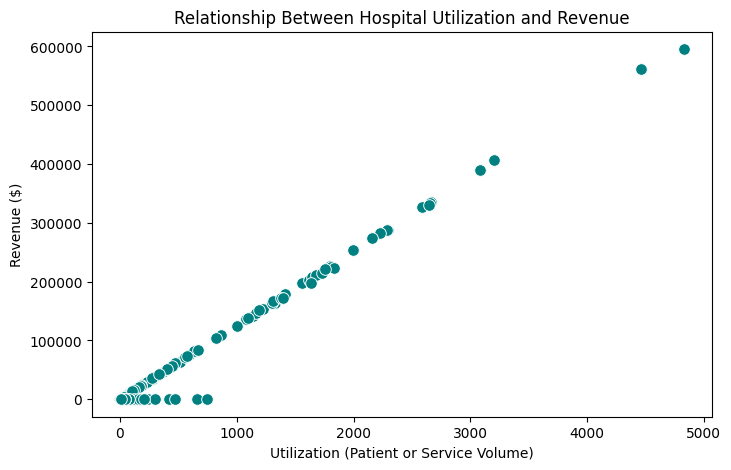

In [70]:
# Your code here to do a first visualization...
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x='UTILIZATION', y='REVENUE', data=data2, color='teal', s=70)
plt.title('Relationship Between Hospital Utilization and Revenue')
plt.xlabel('Utilization (Patient or Service Volume)')
plt.ylabel('Revenue ($)')
plt.show()


### Observations #
The scatter plot shows a clear positive relationship between hospital utilization and revenue. Hospitals with higher utilization levels—meaning they serve more patients or provide more services—tend to generate higher revenues overall. This suggests that hospital income is closely tied to patient volume and service demand. However, a few hospitals appear to have relatively high utilization but lower revenues, which may indicate differences in payer mix, pricing strategies, or community-based care models. Overall, the visualization highlights that operational activity is a strong driver of financial performance in healthcare institutions.

_Double-click this text and then edit it to put in your observations_

/tmp/ipython-input-3305101983.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='NAME', x='REVENUE', data=top10, palette='crest')


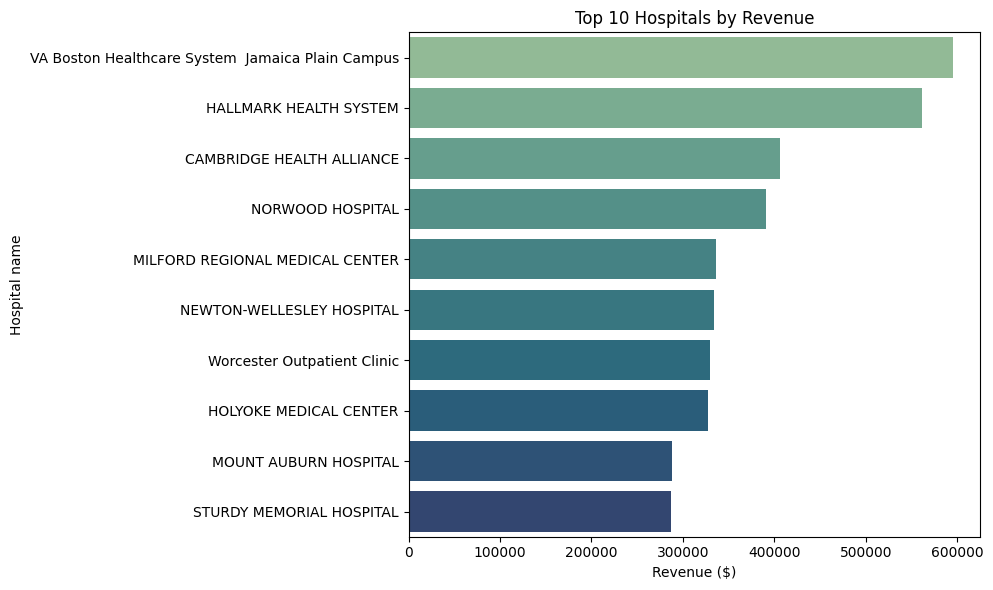

In [74]:
plt.figure(figsize=(10,6))
top10 = data2.sort_values(by='REVENUE', ascending=False).head(10)
sns.barplot(y='NAME', x='REVENUE', data=top10, palette='crest')
plt.title('Top 10 Hospitals by Revenue')
plt.xlabel('Revenue ($)')
plt.ylabel('Hospital name')
plt.tight_layout()
plt.show()


### Observations #2
The horizontal bar chart highlights the ten hospitals with the highest reported revenues in the dataset. The visualization shows noticeable differences in financial performance among hospitals, with a few large institutions generating substantially more revenue than others. These top-performing hospitals are likely major regional or teaching centers located in larger cities such as Cambridge or Lawrence, serving higher patient volumes and offering more specialized services. Smaller community hospitals appear lower on the chart, reflecting more limited service capacity or narrower patient bases. Overall, this visualization demonstrates how hospital size, location, and service scope contribute to major differences in revenue across healthcare organizations.

_Double-click this text and then edit it to put in your observations_



---



## Submitting Your Work

As usual, submit your work using the git command line